In [ ]:
! pip install -q insightface onnxruntime

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis

In [ ]:
app = FaceAnalysis(name="buffalo_l", providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

In [9]:
data = np.load("/content/face_bank.npy", allow_pickle=True)

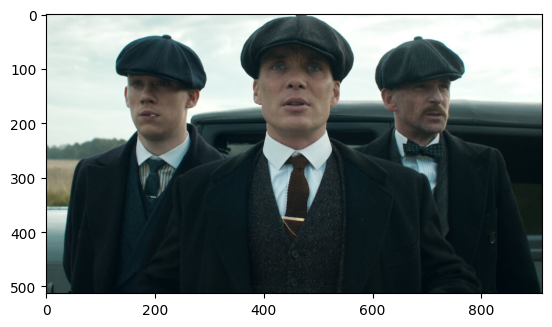

In [11]:
image = cv2.imread("/content/test.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [12]:
result_test = app.get(image)

In [36]:
threshold = 22
img = image.copy()
for i in data:
  for face in result_test:
      embedding = face["embedding"]
      distance = np.sqrt(np.sum((embedding-i["embedding"])**2))

      if distance < threshold:
          cv2.putText(img, i['name'], (int(face['bbox'][0]-40),int(face['bbox'][1]-15)),3,1,(0,255,0),1)
          cv2.rectangle(img, (int(face['bbox'][0]),int(face['bbox'][1])),(int(face['bbox'][2]),int(face['bbox'][3])),(0,255,0),2)

  else:
      cv2.putText(img, "Unknown", (int(face['bbox'][0]-40),int(face['bbox'][1]-15)),3,1,(255,0,0),1)
      cv2.rectangle(img, (int(face['bbox'][0]),int(face['bbox'][1])),(int(face['bbox'][2]),int(face['bbox'][3])),(255,0,0),2)


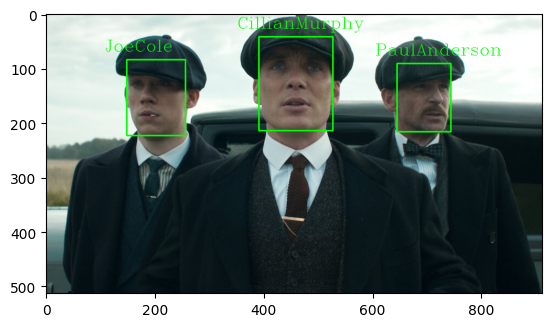

In [37]:
plt.imshow(img)
plt.show()